In [38]:
import pandas
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pandas.read_csv('../Datasets/winequality-red.csv',sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


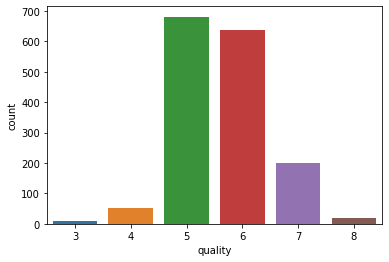

In [6]:
sns.countplot(data=df,x="quality")

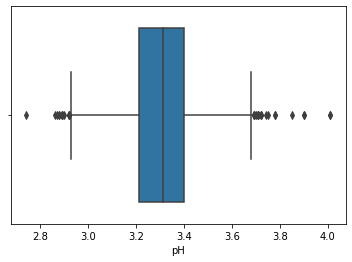

In [8]:
sns.boxplot(data=df,x='pH')

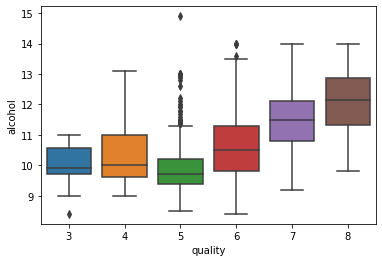

In [9]:
sns.boxplot(data=df,x='quality',y="alcohol")

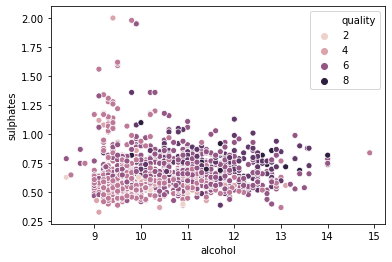

In [15]:
sns.scatterplot(data=df,x="alcohol",y="sulphates",hue='quality')

# Modelo con árboles de decisión

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
dfX = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
dfX.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
dfY = df[['quality']]
dfY.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [22]:
X = dfX.values 
Y = dfY.values
names = dfX.columns
print('features:',names)

features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)
print('X',X.shape,'y',len(Y))
print('Xtrain',Xtrain.shape,'Ytrain',len(ytrain))
print('Xtest',Xtest.shape,'Ytest',len(ytest))


X (1599, 11) y 1599
Xtrain (1119, 11) Ytrain 1119
Xtest (480, 11) Ytest 480


In [26]:
model = DecisionTreeRegressor(min_samples_leaf=20)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
print('MAE:',mean_absolute_error(ytest,ypred))

MAE: 0.5180485684857074


In [28]:
file_model = 'winequality_tree.txt'
export_graphviz(model,feature_names=names,out_file=file_model)
' https://edotor.net/ '

' https://edotor.net/ '

## Importancia de variables

In [36]:
print(np.sum(model.feature_importances_))
print(model.feature_importances_)

for var,fi in zip(names,np.round(model.feature_importances_,3)):
    print(var,fi)

1.0
[0.0150037  0.13142796 0.00440293 0.01815393 0.         0.0277009
 0.06241445 0.0021797  0.02336866 0.21801043 0.49733733]
fixed acidity 0.015
volatile acidity 0.131
citric acid 0.004
residual sugar 0.018
chlorides 0.0
free sulfur dioxide 0.028
total sulfur dioxide 0.062
density 0.002
pH 0.023
sulphates 0.218
alcohol 0.497


# Random Forest

In [39]:
model = RandomForestRegressor(min_samples_leaf=20)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
print('MAE:',mean_absolute_error(ytest,ypred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MAE: 0.49597119642684717


In [40]:
print(np.sum(model.feature_importances_))
print(model.feature_importances_)

for var,fi in zip(names,np.round(model.feature_importances_,3)):
    print(var,fi)

1.0000000000000002
[0.01214613 0.12205611 0.01773219 0.00939658 0.01992081 0.01778159
 0.05033435 0.01657641 0.02487589 0.21144443 0.49773551]
fixed acidity 0.012
volatile acidity 0.122
citric acid 0.018
residual sugar 0.009
chlorides 0.02
free sulfur dioxide 0.018
total sulfur dioxide 0.05
density 0.017
pH 0.025
sulphates 0.211
alcohol 0.498
